In [2]:
import nltk
from nltk import word_tokenize, pos_tag , sent_tokenize
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
import sklearn
import seaborn as sns
pio.renderers.default = "svg"
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
!pip install pywaffle matplotlib
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer 
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# **Présentation du Dataset et analyse des variables**

In [4]:
data = pd.read_csv("/content/sample_data/covid19_tweets[1].csv",encoding='latin1')
df=data
df.head(5)

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,GenerasiYeremia,â××× ××××¨××¡× ×××¤××¢ ××§×¨××....,1 Korintus 10:23; Daniel 9:27,1869.0,2365.0,7415.0,2020-05-18 12:44:27,2021-01-18 05:20:36,0.0,@TheBelieverJC Amen\n\n#Akhirzaman\n#Endtimes\...,"[{'text': 'Akhirzaman', 'indices': [21, 32]}, ..."
1,CuyahogaOEM,Cuyahoga Co. Office of Emergency Management. S...,"Cuyahoga County, OH",212.0,1180.0,8687.0,2014-08-20 18:02:05,2021-01-18 05:20:32,47.0,Our new vaccine provider tool shows locations ...,"[{'text': 'COVID19', 'indices': [113, 121]}]"
2,GenerasiYeremia,â××× ××××¨××¡× ×××¤××¢ ××§×¨××....,1 Korintus 10:23; Daniel 9:27,1869.0,2365.0,7415.0,2020-05-18 12:44:27,2021-01-18 05:20:31,0.0,Amen\n\n#Akhirzaman\n#Endtimes\n#BibleProphecy...,"[{'text': 'Akhirzaman', 'indices': [6, 17]}, {..."
3,NoumaanMuhamma1,"Allah ka banda, Aadam ka beta!",NaN,236.0,11.0,100.0,2020-06-02 10:15:19,2021-01-18 05:20:28,0.0,2020 shouldn't be include to our age\n\n#COVID19,"[{'text': 'COVID19', 'indices': [38, 46]}]"
4,viralvideovlogs,news news news and trends\n\nhttps://t.co/2ScZ...,à´àµà´°à´³à´,4566.0,5177.0,513416.0,2018-01-13 18:33:01,2021-01-18 05:20:27,1.0,My friend's dad recently tested positive. Inte...,[]


In [5]:
#colonnes 
df.columns

Index(['username', 'acctdesc', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetcreatedts', 'retweetcount',
       'text', 'hashtags'],
      dtype='object')

In [6]:
#info sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4135 entries, 0 to 4134
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        4135 non-null   object 
 1   acctdesc        3601 non-null   object 
 2   location        2932 non-null   object 
 3   following       4134 non-null   float64
 4   followers       4134 non-null   float64
 5   totaltweets     4134 non-null   float64
 6   usercreatedts   4134 non-null   object 
 7   tweetcreatedts  4134 non-null   object 
 8   retweetcount    4134 non-null   float64
 9   text            4134 non-null   object 
 10  hashtags        4134 non-null   object 
dtypes: float64(4), object(7)
memory usage: 355.5+ KB


In [7]:
#Variable retweetcount
df.retweetcount.value_counts()

0.0        814
1.0        395
2.0        246
3.0        181
4.0        114
          ... 
194.0        1
16344.0      1
113.0        1
345.0        1
3337.0       1
Name: retweetcount, Length: 304, dtype: int64

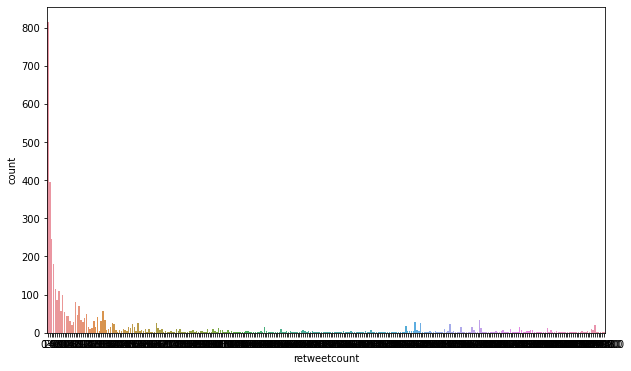

In [8]:
#retweetcount BARPLOT
plt.figure(figsize=(10,6))
sns.countplot(x='retweetcount', data = df);

In [9]:
#VARIABLE LOCATION
df.location.value_counts()

India                   68
United States           61
New Delhi, India        61
à´àµà´°à´³à´         45
Bangkok, Thailand       35
                        ..
Berlin                   1
Anakapalli, India        1
NorCal, USA              1
Quezon City              1
Doha ,State of Qatar     1
Name: location, Length: 1363, dtype: int64

# **Classification** **XGBOOST**

In [10]:
!pip3 install xgboost

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

In [132]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['text'].values.astype('U'))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['retweetcount'], test_size=0.25, random_state=5)

In [133]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [184]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)
from sklearn import metrics
predicted= XGB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

43.42%


# **Classification random forest**

In [183]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['text'].values.astype('U'))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['retweetcount'].values.astype('U'), test_size=0.25, random_state=5)

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, Y_train)
from sklearn import metrics
predicted= clf.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')




63.06%


# **Classification Naive BAYES**

- Classificateur MultinomialNB avec countvectorizer avec Ngram 1 

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['text'].values.astype('U'))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['retweetcount'].values.astype('U'), test_size=0.25, random_state=5)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
from sklearn import metrics
predicted= MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

48.07%


* Classificateur MultinomialNB avec countvectorizer avec Ngram 2



In [172]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(2,2),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['text'].values.astype('U'))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['retweetcount'].values.astype('U'), test_size=0.25, random_state=5)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
from sklearn import metrics

accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print('MultinomialNB = ' +str('{:04.2F}'.format(accuracy_score*100))+'%')

MultinomialNB = 52.13%


* Classificateur ComplementNB avec countvectorizer


In [174]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(data['text'].values.astype('U'))
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['retweetcount'].values.astype('U'), test_size=0.25, random_state=5)

from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(X_train, Y_train)


from sklearn import metrics

predicted= CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

50.87%


* Classificateur BernouilliNB avec countvectorizer



In [197]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)


from sklearn import metrics

predicted= BNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

18.96%


* Différent algorithme naive bayes avec TF-IDF

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_counts_2 = tfidf.fit_transform(data["text"].values.astype('U'))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_counts_2, data['retweetcount'].values.astype('U'), test_size=0.25, random_state=42)
#
MNB.fit(x_train, y_train)
MNBaccuracy_score = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('Multinominal NB = ' +str('{:04.2F}'.format(MNBaccuracy_score*100))+'%')
#
CNB.fit(x_train, y_train)
CNBaccuracy_score = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('Complement  NB = ' +str('{:04.2F}'.format(CNBaccuracy_score*100))+'%')
BNB.fit(x_train, y_train)
BNBaccuracy_score = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('Bernoulli NB = ' +str('{:04.2F}'.format(BNBaccuracy_score*100))+'%')

Multinominal NB = 26.02%
Complement  NB = 51.74%
Bernoulli NB = 19.25%


# **Matrice de confusion**

Text(0.5, 1.0, 'Confusion Matrix')

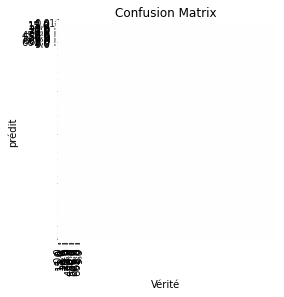

In [178]:

from sklearn.metrics import confusion_matrix

MNB.fit(x_train, y_train)
pred = MNB.predict(x_test)
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Vérité')
plt.ylabel('prédit')
plt.title("Confusion Matrix")

# **Classificateur SVM**

In [179]:
from sklearn.svm import LinearSVC
LSVC = LinearSVC()
#ON TF_idf data
print('On Tf_idf') 
LSVC.fit(x_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(x_test), y_test)
print('accuuracy_score_lsvc= ' + str('{:04.2F}'.format(accuracy_score_lsvc*100))+'%')
print('on countvectorizer data') 
LSVC.fit(X_train, Y_train)
accuracy_score_lsvc2 = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print('accuuracy_score_lsvc= ' + str('{:04.2F}'.format(accuracy_score_lsvc2*100))+'%')

On Tf_idf
accuuracy_score_lsvc= 60.64%
on countvectorizer data
accuuracy_score_lsvc= 60.83%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



# **Comparaison des classificateurs**

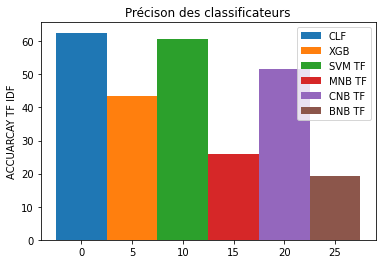

In [192]:
plt.bar(0,CLFaccuracy_score*100,5, label="CLF")
plt.bar(5,XGBaccuracy_score*100,5, label="XGB")
plt.bar(10,accuracy_score_lsvc*100,5, label="SVM TF")
plt.bar(15,MNBaccuracy_score*100,5, label="MNB TF")
plt.bar(20,CNBaccuracy_score*100,5, label="CNB TF")
plt.bar(25,BNBaccuracy_score*100,5, label="BNB TF")
plt.legend()
plt.ylabel('ACCUARCAY TF IDF')
plt.title('Précison des classificateurs')
plt.show()